In [1]:
# Import our dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

In [2]:
# Import our cleaned dataset
cleaned_airbnb_df = pd.read_csv("Resources/cleaned_airbnb_dataset2.csv")
cleaned_airbnb_df.head()

,room_id,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total
0,958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,30,37.76931,-122.43386,217,97.0,170.0,100.0,270.0
1,3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,5,37.75402,-122.45805,160,94.0,99.0,10.0,109.0
2,5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,60,37.74511,-122.42102,111,98.0,235.0,100.0,335.0
3,7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,60,37.76669,-122.45250,18,86.0,65.0,50.0,115.0
4,8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,90,37.76487,-122.45183,8,93.0,65.0,50.0,115.0


#### Relationship between property type on price

Text(0.5, 0.98, 'Property Price in San Francisco, according to property type')

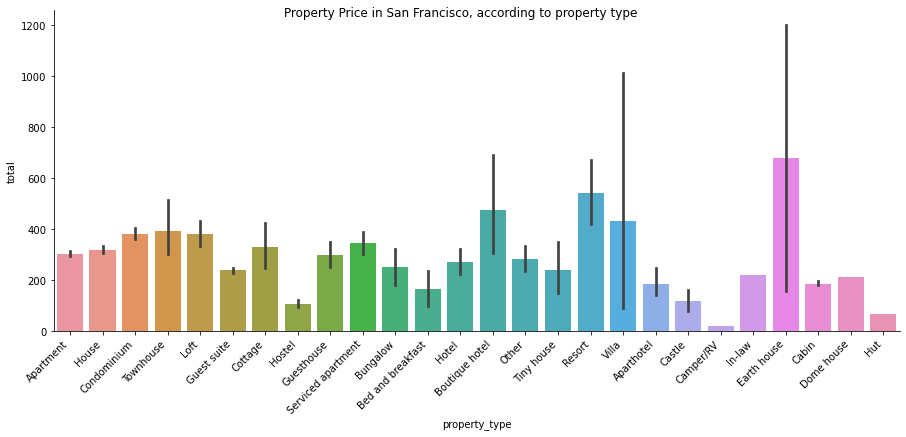

In [3]:
pt_price=sns.catplot(x='property_type', y='total', kind ='bar', data= cleaned_airbnb_df, aspect=2.5)
                                     
pt_price.set_xticklabels(rotation=45, horizontalalignment='right')
                                    
pt_price.fig.suptitle("Property Price in San Francisco, according to property type")

#### The relationship between property_type and room_type on price

Text(0.5, 1.1, 'Property Price in San Francisco, according to Room Type & Property Type')

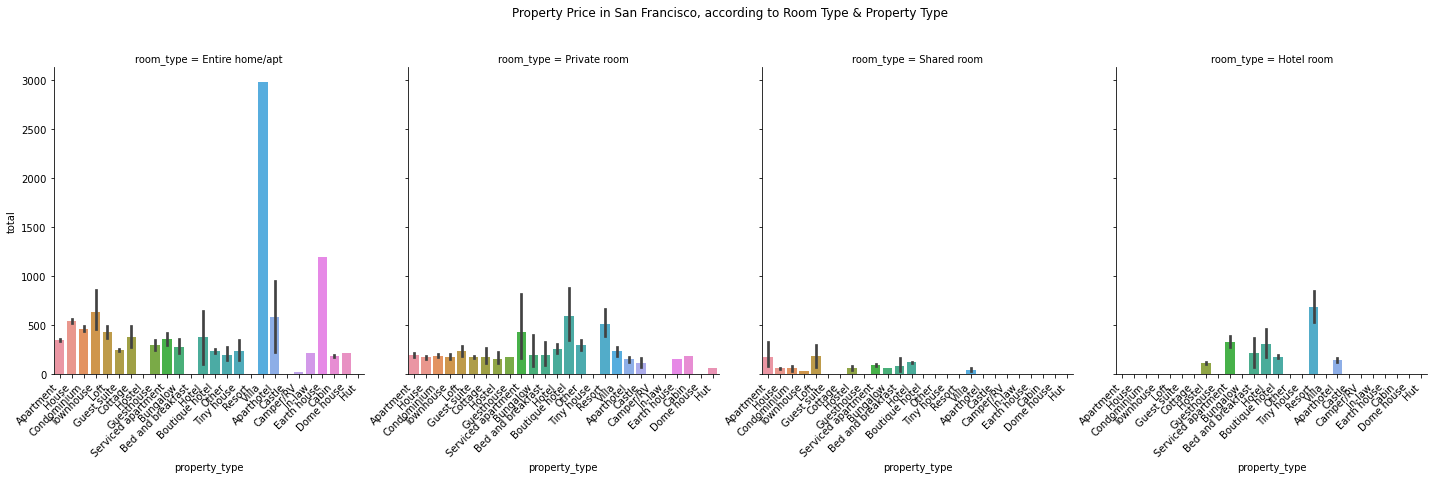

In [4]:
prt_price=sns.catplot(x='property_type', y='total', col='room_type', data= cleaned_airbnb_df, kind="bar")
                                     
prt_price.set_xticklabels(rotation=45, horizontalalignment='right')
                                    
prt_price.fig.suptitle("\n".join(["Property Price in San Francisco, according to Room Type & Property Type"]), y=1.1)

#### The relationship between accomodates, bathrooms and bedrooms on price

Text(0.5, 1.1, 'Property Price in San Francisco, according to accomodates, bathrooms and bedrooms')

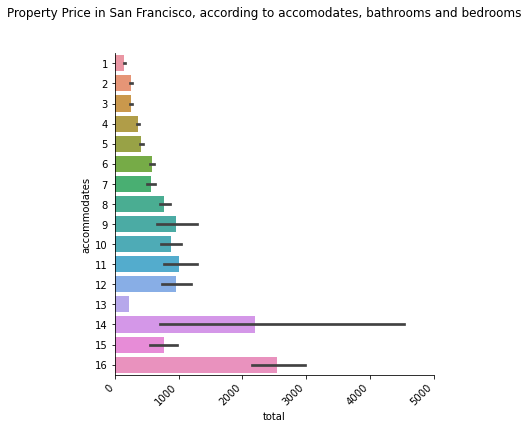

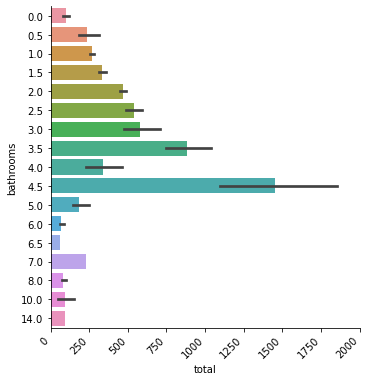

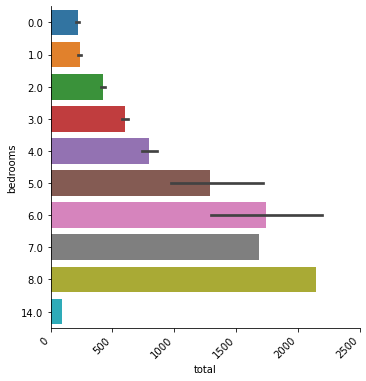

In [5]:
accm_price=sns.catplot(x='total', y='accommodates', orient='h', data= cleaned_airbnb_df, kind="bar")
br_price=sns.catplot(x='total', y='bathrooms', orient='h', data= cleaned_airbnb_df, kind="bar")
bedr_price=sns.catplot(x='total', y='bedrooms', orient='h', data= cleaned_airbnb_df, kind="bar")
                                     
accm_price.set_xticklabels(rotation=45, horizontalalignment='right')
br_price.set_xticklabels(rotation=45, horizontalalignment='right')
bedr_price.set_xticklabels(rotation=45, horizontalalignment='right')
                                    
accm_price.fig.suptitle("\n".join([
    "Property Price in San Francisco, according to accomodates, bathrooms and bedrooms"]), y=1.1)

### Correlation?
#### To evaluate further, turn categorical columns into dummies variable, using pd_getdummies

In [6]:
dummy_sf_airbnb = pd.get_dummies(cleaned_airbnb_df,
                                 columns=['host_is_superhost','property_type','room_type','neighborhood','zipcode'])

In [7]:
# Merge dummies column into clean dataset
dummy_sf_airbnb_merged = pd.concat([cleaned_airbnb_df,dummy_sf_airbnb], axis=1)

In [8]:
dummy_sf_airbnb_merged.head()

,room_id,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,...,zipcode_94123,zipcode_94124,zipcode_94127,zipcode_94129,zipcode_94130,zipcode_94131,zipcode_94132,zipcode_94133,zipcode_94134,zipcode_94158
0,958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
4,8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Keep only relevant factors that contribute to the features
dummy_sf_airbnb_merged.drop(dummy_sf_airbnb_merged.columns
                            .difference(['accommodates','bedrooms','bathrooms','minimun_nights','maximum_nights',
                                       'review_scores_rating','price','cleaning_fee','total']), 1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix San Francisco')

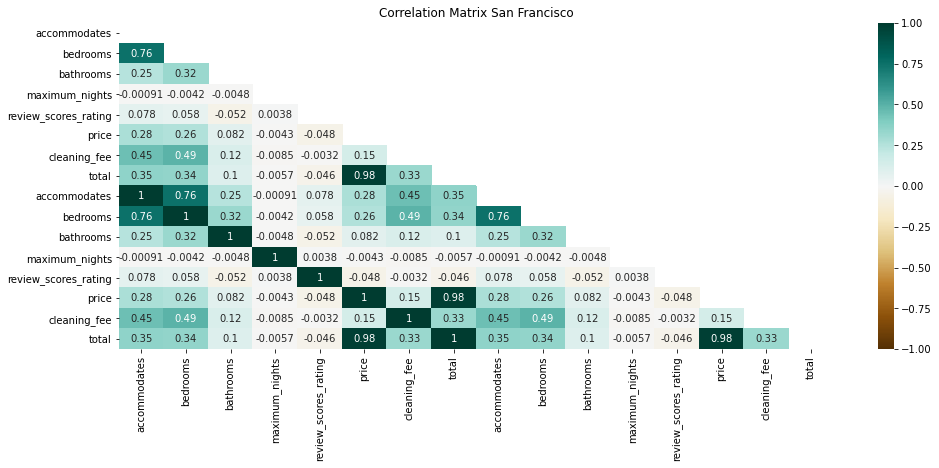

In [10]:
# Correlation Matrix San Francisco
plt.figure(figsize=(16, 6))
corr = dummy_sf_airbnb_merged.corr()

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr, dtype=np.bool))
#plt.rcParams['figure.figsize'] = [12, 9]
#sns.heatmap(corr, mask=mask, annot = True, fmt='.2f')
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
#plt.rcParams['figure.figsize'] = [12, 9]
plt.title(label= "Correlation Matrix San Francisco", fontdict=None, loc='center', pad=None)